In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('master_timeseries.csv',parse_dates=[0]).set_index('date')

In [5]:
df.head()

,ndti,ndvi,tmmx,Precipitation (mm/day),aod,NO2_column_number_density,avg_rad,retail_and_recreation_percent_change_from_baseline
date,,,,,,,,
2017-01-01,NaN,NaN,212.051731,0.0,1410.480210,NaN,25.657537,NaN
2017-01-02,NaN,NaN,NaN,0.0,1058.517596,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,0.0,820.840894,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,0.0,787.354347,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,0.0,895.224579,NaN,NaN,NaN


In [29]:
from astronify.series import SoniSeries
from astropy.table import Table

In [33]:

data_table = Table({"time":list(range(1307)),
                     "flux": df['NO2_column_number_density'].dropna().to_list()})

data_soni = SoniSeries(data_table)
data_soni.note_spacing = 0.05
data_soni.sonify()
data_soni.play()   


In [34]:
data_soni.write("no2.wav")


In [55]:
dff = df[['NO2_column_number_density']].reset_index().dropna()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [92]:
#x = np.linspace(0,10,100)
x=dff.date.to_list()
#y = np.sin(x)
y = dff['NO2_column_number_density'].to_list()

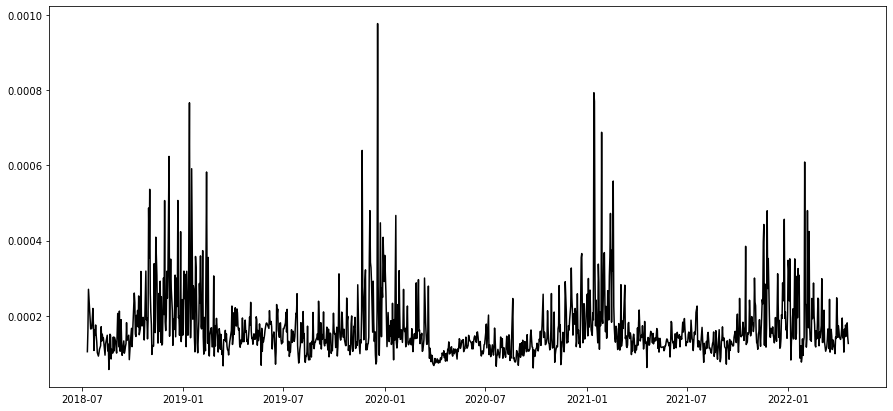

In [95]:
fig,ax = plt.subplots(figsize=(15,7))
line, = ax.plot(x,y,'k')

In [90]:
def update(num,x,y,line):
    line.set_data(x[:num],y[:num])
    #line.axes.axis([,,0,0.001])
    return line,

In [91]:
ani = animation.FuncAnimation(fig, update,len(x), fargs=[x,y,line],interval=50,blit=True)
ani.save('test.gif')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
